In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip

--2022-12-28 13:19:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1090294 (1.0M) [application/x-httpd-php]
Saving to: ‘pp_gas_emission.zip’

pp_gas_emission.zip 100%[===================>]   1.04M  --.-KB/s    in 0.06s   

2022-12-28 13:19:12 (17.3 MB/s) - ‘pp_gas_emission.zip’ saved [1090294/1090294]



In [2]:
!unzip pp_gas_emission.zip

Archive:  pp_gas_emission.zip
  inflating: gt_2011.csv             
  inflating: gt_2012.csv             
  inflating: gt_2013.csv             
  inflating: gt_2014.csv             
  inflating: gt_2015.csv             


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_2015 = pd.read_csv('gt_2015.csv')
data_2015.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [5]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [6]:
data_2015.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


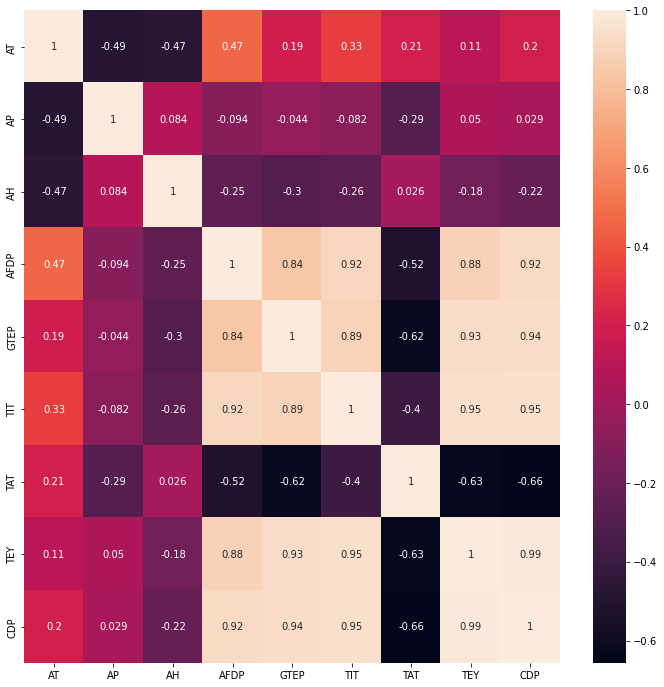

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(data_2015.loc[:,'AT':'CDP'].corr(), annot = True)

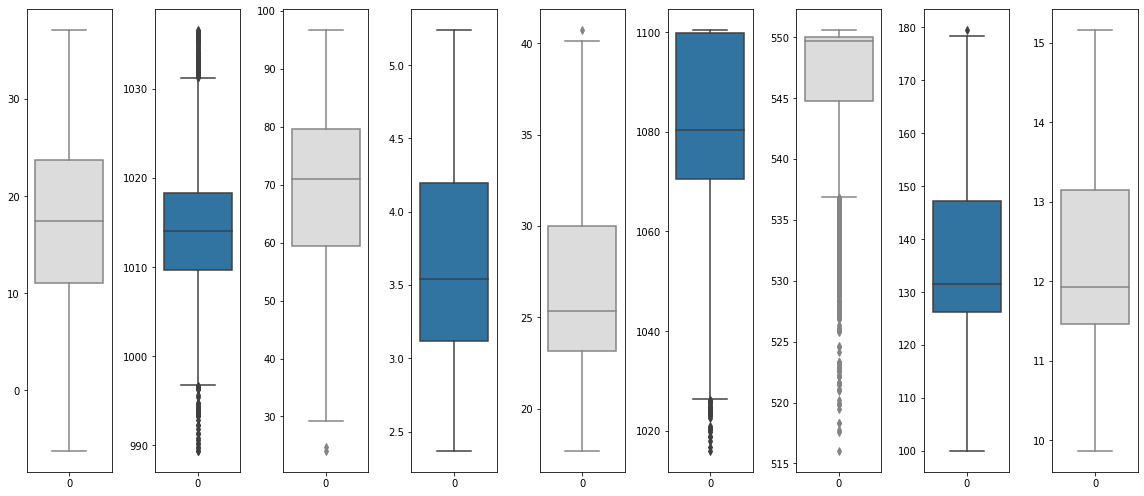

In [8]:
plt.rcParams['figure.figsize']=(16,7)
f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(1,9)
sns.boxplot( data=data_2015['AT'], ax=ax1, palette = 'coolwarm')
sns.boxplot(data=data_2015['AP'], ax=ax2)
sns.boxplot(data=data_2015['AH'], ax=ax3, palette = 'coolwarm')
sns.boxplot(data=data_2015['AFDP'], ax=ax4)
sns.boxplot(data=data_2015['GTEP'], ax=ax5, palette = 'coolwarm')
sns.boxplot(data=data_2015['TIT'], ax=ax6)
sns.boxplot(data=data_2015['TAT'], ax=ax7, palette = 'coolwarm')
sns.boxplot(data=data_2015['TEY'], ax=ax8)
sns.boxplot(data=data_2015['CDP'], ax=ax9, palette = 'coolwarm')
f.tight_layout()

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [10]:
data_2015_scaled = StandardScaler().fit_transform(data_2015.loc[:,'AT':'CDP'])

In [11]:
lof = LocalOutlierFactor(n_neighbors=9) 

In [12]:
pred = lof.fit_predict(data_2015_scaled)

In [13]:
pd.Series(pred).value_counts()

 1    7187
-1     197
dtype: int64

In [14]:
all_preds = np.zeros(shape=(data_2015_scaled.shape[0],3))
i = 0
for n_neigh in range(5,10,2):
  lof = LocalOutlierFactor(n_neighbors=n_neigh)
  pred = lof.fit_predict(data_2015_scaled)
  all_preds[:,i] = pred
  i += 1

In [15]:
all_preds

array([[-1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [-1.,  1., -1.]])

In [16]:
outlier_preds = all_preds.sum(axis = 1)

In [17]:
final_outliers = np.where(outlier_preds>=1,1,-1)

In [18]:
pd.Series(final_outliers).value_counts()

 1    7159
-1     225
dtype: int64

In [19]:
225/7384

0.030471289274106174

In [20]:
data_2015_no_outlier = data_2015[final_outliers==1]

In [21]:
import statsmodels.formula.api as sm

In [22]:
columns = data_2015.columns

In [23]:
columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [24]:
f = 'CO~' + '+'.join(columns[:9])
f

'CO~AT+AP+AH+AFDP+GTEP+TIT+TAT+TEY+CDP'

In [25]:
r = sm.ols(formula = f, data = data_2015_no_outlier)

In [26]:
result = r.fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:19:17   Log-Likelihood:                -12124.
No. Observations:                7159   AIC:                         2.427e+04
Df Residuals:                    7149   BIC:                         2.434e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.8537      6.141     23.586      0.000     132.815     156.893
AT            -0.0565      0.008     -7.246      0.000      -0.072      -0.041
AP             0.0047      0.003      1.500      0.134      -0.001       0.011
AH            -0.0157      0.002    -10.110      0.000      -0.019      -0.013
AFDP           0.2739      0.117      2.333      0.020       0.044       0.504
GTEP           0.0531      0.011      4.689      0.000       0.031       0.075
TIT           -0.1104      0.023     -4.810      0.000      -0.155      -0.065
TAT           -0.0603      0.029     -2.099      0.036      -0.117      -0.004
TEY           -0.0961      0.024     -4.024      0.000      -0.143      -0.049
CDP            1.4974      0.331      4.528      0.000       0.849       2.146
==============================================================================
Omnibus:                    10769.223   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10389742.634
Skew:                           8.946   Prob(JB):                         0.00
Kurtosis:                     188.771   Cond. No.                     6.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
variance_inflation_factor(data_2015_no_outlier.loc[:,'AT':'CDP'].values, 0)

65.92940081736425

In [30]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
X_1 = data_2015_no_outlier.loc[:,'AT':'CDP'].copy()

In [32]:
vif_scores = {k: v for k, v in zip(X_1.columns,\
                                   [variance_inflation_factor(X_1.values,i)\
                                    for i in range(len(X_1.columns))])}

In [33]:
vif_scores

{'AT': 65.92940081736425,
 'AP': 40396.404714710916,
 'AH': 48.3585847654798,
 'AFDP': 715.6923146022348,
 'GTEP': 369.95230441335735,
 'TIT': 1673481.2957400791,
 'TAT': 844574.6684435576,
 'TEY': 20319.67902437122,
 'CDP': 66601.23646306718}

In [34]:
vif_scores_sorted = {k:v for k,v in sorted(vif_scores.items(),\
                                           key = lambda item: item[1],\
                                           reverse=True)}

In [35]:
vif_scores_sorted

{'TIT': 1673481.2957400791,
 'TAT': 844574.6684435576,
 'CDP': 66601.23646306718,
 'AP': 40396.404714710916,
 'TEY': 20319.67902437122,
 'AFDP': 715.6923146022348,
 'GTEP': 369.95230441335735,
 'AT': 65.92940081736425,
 'AH': 48.3585847654798}

In [36]:
X_1.columns.drop('TIT')

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TAT', 'TEY', 'CDP'], dtype='object')

In [37]:
def var_selection_vif(data_exog: pd.DataFrame, th: int = 5):
    vif_scores = {k: v for k,v in zip(data_exog.columns,
                                      [variance_inflation_factor(data_exog.values, i)\
                                       for i in range(len(data_exog.columns))])}
    vif_scores_sorted = {k:v for k,v in sorted(vif_scores.items(),\
                                           key = lambda item: item[1],\
                                           reverse=True)}
    if vif_scores_sorted[list(vif_scores_sorted.keys())[0]] > th:
       vars = data_exog.columns.drop(list(vif_scores_sorted.keys())[0])
       return(data_exog[vars],vif_scores_sorted)

    else:
       return(data_exog,vif_scores_sorted)

In [38]:
n_old = len(X_1.columns)
n_new = 0
while n_old != n_new:
  X_1, vif = var_selection_vif(X_1)
  print(vif)
  n = len(X_1.columns)
  n_old = n_new
  n_new = n

{'TIT': 1673481.2957400791, 'TAT': 844574.6684435576, 'CDP': 66601.23646306718, 'AP': 40396.404714710916, 'TEY': 20319.67902437122, 'AFDP': 715.6923146022348, 'GTEP': 369.95230441335735, 'AT': 65.92940081736425, 'AH': 48.3585847654798}
{'CDP': 29744.235114217634, 'AP': 29003.664238359204, 'TAT': 19920.37840401725, 'TEY': 14489.184063678527, 'AFDP': 701.9643730827204, 'GTEP': 351.09655451637667, 'AT': 56.23257733699514, 'AH': 47.484771044147266}
{'TAT': 12484.500222800554, 'AP': 12278.371749501703, 'TEY': 1554.008179282431, 'AFDP': 672.4838658878869, 'GTEP': 324.14223274386853, 'AH': 45.94095549024532, 'AT': 36.68420352607462}
{'TEY': 1456.9351497997936, 'AFDP': 528.7516273469298, 'GTEP': 321.8667730942754, 'AP': 254.06800824249143, 'AH': 41.56785047558292, 'AT': 21.387382335067336}
{'AFDP': 217.76502657277584, 'GTEP': 180.93450449034555, 'AP': 107.96280256619794, 'AH': 41.25761709597349, 'AT': 12.288978268695661}
{'AP': 105.81757491819491, 'GTEP': 38.79229456988282, 'AH': 36.3040303137

In [39]:
r_final = sm.ols(formula = 'CO~AT+AH', data = data_2015_no_outlier[list(X_1.columns)+['CO']])
result_final = r_final.fit()
print(result_final.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     663.6
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          4.13e-265
Time:                        13:19:17   Log-Likelihood:                -15228.
No. Observations:                7159   AIC:                         3.046e+04
Df Residuals:                    7156   BIC:                         3.048e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3010      0.176     30.099      0.0

In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso_reg = Lasso(alpha = 2)
lasso_reg.fit(X=data_2015_no_outlier.loc[:,'AT':'CDP'], y = data_2015_no_outlier['CO'])

Lasso(alpha=2)

In [42]:
{k:v for k,v in zip(data_2015_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg.coef_)}

{'AT': -0.006032422471444792,
 'AP': 0.0,
 'AH': -0.0,
 'AFDP': -0.0,
 'GTEP': 0.0,
 'TIT': -0.08099580349231988,
 'TAT': -0.035685853754859026,
 'TEY': 0.0,
 'CDP': 0.0}

In [43]:
lasso_reg.score(X = data_2015_no_outlier.loc[:,'AT':'CDP'], y = data_2015_no_outlier['CO'])

0.5916329591625795

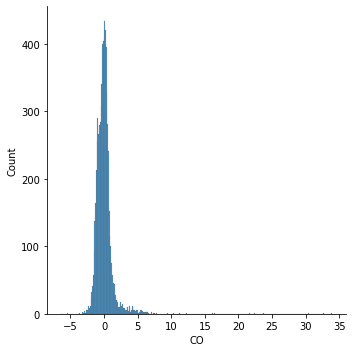

In [44]:
errors = data_2015_no_outlier['CO'] - lasso_reg.predict(data_2015_no_outlier.loc[:,'AT':'CDP'])
d = sns.displot(errors)
print(d)

In [45]:
import statsmodels.api as smf

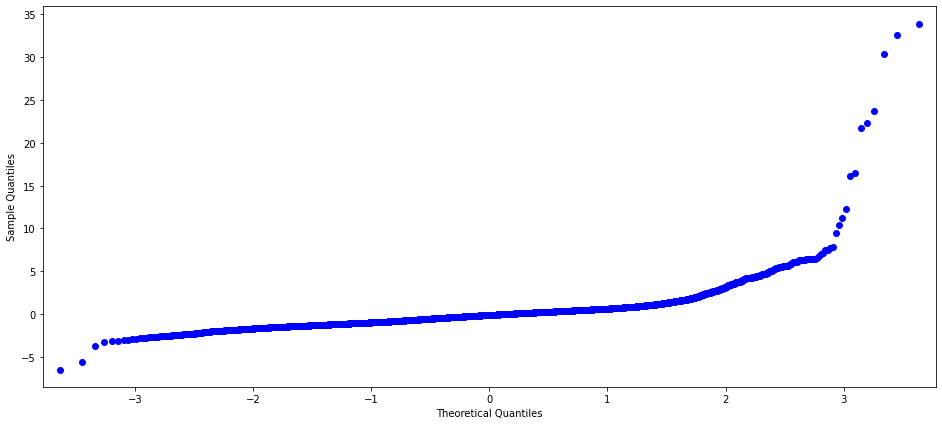

In [46]:
smf.qqplot(errors)
plt.show()

In [47]:
r_final_new = sm.ols(formula = 'CO~AT+TIT+TAT', data = data_2015[['AT','TIT','TAT']+['CO']])
result_final_new = r_final_new.fit()
print(result_final_new.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4210.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:19:20   Log-Likelihood:                -12733.
No. Observations:                7384   AIC:                         2.547e+04
Df Residuals:                    7380   BIC:                         2.550e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    171.2648      2.545     67.294      0.0

#Cook's Distance = Change in model when a single datapoint is dropped

##If Cook's Distance > (4/n) then it is the potential outlier

In [48]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [49]:
inf = influence(result_final_new)

In [50]:
inf.cooks_distance

(0       0.000110
 1       0.000003
 2       0.000011
 3       0.000004
 4       0.000103
           ...   
 7379    0.001626
 7380    0.001812
 7381    0.002095
 7382    0.000005
 7383    0.003725
 Length: 7384, dtype: float64,
 array([0.99999998, 1.        , 1.        , ..., 0.99999124, 1.        ,
        0.99997238]))

In [51]:
inf.summary_frame()[inf.summary_frame()['cooks_d']>= 4/7384]

,dfb_Intercept,dfb_AT,dfb_TIT,dfb_TAT,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
16,0.108856,-0.008140,-0.092941,-0.095532,0.004485,2.926103,0.002091,0.133939,2.927603,0.134008
35,0.025332,0.043067,-0.018354,-0.025228,0.000556,-1.364092,0.001193,-0.047139,-1.364171,-0.047142
36,-0.139775,0.021944,0.124119,0.119692,0.008220,-3.960878,0.002091,-0.181331,-3.964826,-0.181512
40,-0.053126,0.029289,-0.004411,0.074277,0.002785,-2.369880,0.001979,-0.105541,-2.370621,-0.105574
41,-0.028251,0.025000,-0.009265,0.043181,0.001214,-1.783672,0.001524,-0.069681,-1.783936,-0.069691
...,...,...,...,...,...,...,...,...,...,...
7375,-0.030899,0.013163,-0.001455,0.042652,0.000850,-1.353762,0.001852,-0.058317,-1.353839,-0.058321
7379,0.057034,-0.008224,-0.059928,-0.043517,0.001626,2.271803,0.001258,0.080636,2.272444,0.080659
7380,0.058712,-0.008975,-0.063503,-0.043743,0.001812,2.491784,0.001166,0.085131,2.492664,0.085161
7381,0.061113,-0.007768,-0.070065,-0.043288,0.002095,2.838897,0.001039,0.091553,2.840255,0.091597


##After calculating Cook's distance we look at Standard Residual. If this is high then it is **Bad Leverage Point** else **Good**.

In [52]:
from hyperopt import fmin,hp, STATUS_OK, tpe, Trials  #This package has Bayesian Search to give good set of hyperparameters to build the model
from hyperopt.pyll.base import scope
import hyperopt

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [54]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()

In [55]:
gt_new = data_2015.loc[:,'AT':'CO']
gt_new.shape

(7384, 10)

In [56]:
param_dt = {
    'max_depth': scope.int(hp.quniform('max_depth',2,20,1)),
    'ccp_alpha': hp.uniform('ccp_alpha',0.001,0,1)
}

param_rf = {
    'n_estimators': scope.int(hp.quniform('n_estimators',50,500,1)),
    'max_features': hp.choice('max_features', list(range(2,7)))
}

param_gbm = {
    'max_depth': scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators': scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate': hp.uniform('learning_rate', 0.001,0.1)
}

param_xgb = {
    'max_depth': scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators': scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate': hp.uniform('learning_rate', 0.001,0.1),
    'colsample_bytree': hp.uniform('lcolsample_bytree', 0.2,0.8)
}

In [57]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
x_train, x_test, y_train, y_test = train_test_split(gt_new.loc[:,'AT':'CDP'],
                                                    gt_new['CO'],
                                                    test_size = 0.3,
                                                    random_state =123)


In [59]:
def rmse(y_act, y_pred):
    return(np.sqrt(np.mean((y_act,y_pred)**2)))

rmse = make_scorer(rmse, greater_is_better = False)

In [60]:
def hp_obj_func_dt(param):
    dt = DecisionTreeRegressor(**param)
    out = cross_val_score(dt, X = x_train, y = y_train,
                          scoring = 'neg_root_mean_squared_error', cv = 5).mean()

    print(out)
    return(out)

In [61]:
def surr_func_dt(params):
    perf = hp_obj_func_dt(params)
    return {'loss': -perf, 'status': STATUS_OK}

In [62]:
trials=Trials()
best_dt=fmin(surr_func_dt,space=param_dt,algo=tpe.suggest,max_evals=100,trials=trials)
print('best_dt:')
print(best_dt)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]


TypeError: ignored

In [ ]:
dt_reg = DecisionTreeRegressor(**best_dt)
dt_reg.fit(x_train, y_train)
pred_dt = dt_reg.predict(x_test)
print(mean_squared_error(pred_dt, y_test))

In [63]:
lin_reg.fit(x_train, y_train)
pred_lin_reg = lin_reg.predict(x_test)
print(mean_squared_error(pred_lin_reg, y_test))

1.1916144779735578
